In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [3]:
data_path = r"C:\Users\dell\Desktop\MyDocs\Docs\MK\updated_air_quality_data.csv"
df = pd.read_csv(data_path)

df.head()

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
0,179772,Emissions,Density,UHF42,Queens,Other,2015-01-01,0.3,Good
1,179785,Emissions,Density,UHF42,Unknown,Other,2015-01-01,1.2,Good
2,178540,General Pollution,Miles,UHF42,Unknown,Annual Average,2011-12-01,8.6,Good
3,178561,General Pollution,Miles,UHF42,Queens,Annual Average,2011-12-01,8.0,Good
4,823217,General Pollution,Miles,UHF42,Queens,Summer,2022-06-01,6.1,Good


In [4]:
df.shape

(18016, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             18016 non-null  int64  
 1   Name                  18016 non-null  object 
 2   Measure               18016 non-null  object 
 3   Geo Type Name         18016 non-null  object 
 4   Geo Place Name        18016 non-null  object 
 5   Time Period           18016 non-null  object 
 6   Start_Date            18016 non-null  object 
 7   Data Value            18016 non-null  float64
 8   Air Quality Category  18016 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [6]:
import plotly.express as px
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Calculate the number of unique values for each column except "Unique ID"
num_of_uniques = {col: len(df[col].unique()) for col in df.columns if col != "Unique ID"}

# Create a DataFrame for Plotly
unique_counts_df = pd.DataFrame(num_of_uniques.items(), columns=["Column", "Unique Count"])

# Create the horizontal bar chart
fig = px.bar(
    unique_counts_df,
    x="Unique Count",
    y="Column",
    orientation="h",
    title="Unique Value Count for Each Column",
    width=1200,
    height=650,
    template="ggplot2",
)

# Show the plot

fig.show(renderer = "iframe")

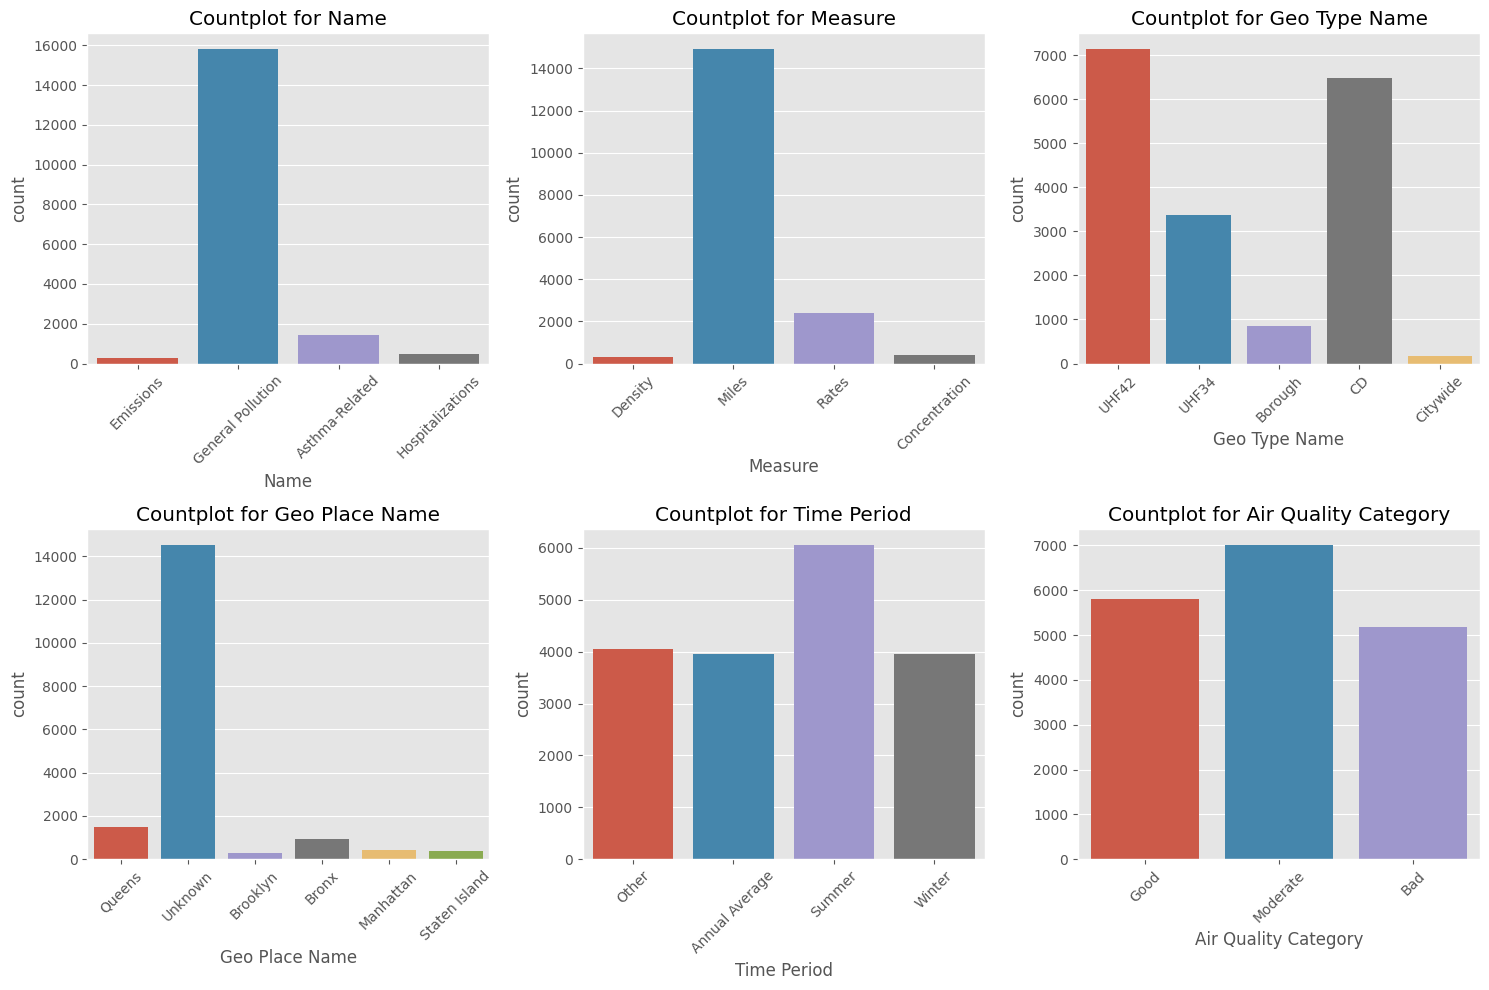

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

categoric_features = [col for col in df.columns if df[col].nunique() < 43]

num_features = len(categoric_features)
rows = (num_features // 3) + (num_features % 3 > 0)
cols = 3

# Create the subplots
plt.style.use("ggplot")
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for idx, col in enumerate(categoric_features):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f"Countplot for {col}")
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(categoric_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, subplot_titles=["Histogram with KDE", "Boxplot"])

fig.add_trace(
    go.Histogram(x=df["Data Value"], name="Histogram", opacity=0.7),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=df["Data Value"].sort_values(),
        y=[0] * len(df["Data Value"]),
        mode='lines',
        name='KDE',
        line=dict(dash='dash', color='red'),
    ),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df["Data Value"], name="Boxplot"),
    row=2, col=1
)

fig.update_layout(
    height=700,
    width=1300,
    showlegend=False,
    title_text="Data Value Distribution and Boxplot"
)

fig.show(renderer = "iframe")

In [9]:
summary_stats = df.groupby("Measure")["Data Value"].agg(
    mean="mean",
    median="median",
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    min="min",
    max="max"
).reset_index()

summary_stats

,Measure,mean,median,q1,q3,min,max
0,Concentration,2.013054,1.8,1.4,2.4,0.6,6.3
1,Density,22.052431,3.0,0.3,23.6,0.0,284.7
2,Miles,19.243647,15.2,9.2,25.8,0.3,191.2
3,Rates,38.103625,20.6,9.0,47.4,0.0,424.7


In [10]:

import plotly.graph_objects as go

# Assuming summary_stats DataFrame is already created

# Create a bar chart
fig = go.Figure()

# Add bars for each statistic
fig.add_trace(go.Bar(x=summary_stats['Measure'], y=summary_stats['mean'], name='Mean'))
fig.add_trace(go.Bar(x=summary_stats['Measure'], y=summary_stats['median'], name='Median'))
fig.add_trace(go.Bar(x=summary_stats['Measure'], y=summary_stats['q1'], name='Q1'))
fig.add_trace(go.Bar(x=summary_stats['Measure'], y=summary_stats['q3'], name='Q3'))
fig.add_trace(go.Bar(x=summary_stats['Measure'], y=summary_stats['min'], name='Min'))
fig.add_trace(go.Bar(x=summary_stats['Measure'], y=summary_stats['max'], name='Max'))

# Update layout
fig.update_layout(
    title="Summary Statistics by Measure",
    xaxis_title="Measure",
    yaxis_title="Values",
    barmode='group',  # Group bars for each Measure
    xaxis_tickangle=-45,  # Rotate x-axis labels
    height=800,
    width=1250
)

# Show the figure
fig.show(renderer = "iframe")

In [11]:
def encode_categoric_values(df, columns):
    """
    Encode categorical values in specified columns with unique numbers and return the modified DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to encode.

    Returns:
    pd.DataFrame: DataFrame with encoded categorical values.
    """
    for col in columns:
        # Get unique values and create a mapping
        unique_values = df[col].unique()
        value_mapping = {value: idx for idx, value in enumerate(unique_values)}

        # Apply the mapping to the column
        df[col] = df[col].map(value_mapping)

        # Print the mapping for the current column
        print(f"Column '{col}':")
        for value, idx in value_mapping.items():
            print(f"  {value} -> {idx}")
        print("-" * 40)
    
    return df

# Example usage:
# df_encoded = encode_categoric_values(df, ['categorical_col1', 'categorical_col2'])

encoded_df = encode_categoric_values(df, categoric_features)

Column 'Name':
  Emissions -> 0
  General Pollution -> 1
  Asthma-Related -> 2
  Hospitalizations -> 3
----------------------------------------
Column 'Measure':
  Density -> 0
  Miles -> 1
  Rates -> 2
  Concentration -> 3
----------------------------------------
Column 'Geo Type Name':
  UHF42 -> 0
  UHF34 -> 1
  Borough -> 2
  CD -> 3
  Citywide -> 4
----------------------------------------
Column 'Geo Place Name':
  Queens -> 0
  Unknown -> 1
  Brooklyn -> 2
  Bronx -> 3
  Manhattan -> 4
  Staten Island -> 5
----------------------------------------
Column 'Time Period':
  Other -> 0
  Annual Average -> 1
  Summer -> 2
  Winter -> 3
----------------------------------------
Column 'Air Quality Category':
  Good -> 0
  Moderate -> 1
  Bad -> 2
----------------------------------------


In [12]:
encoded_df

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
0,179772,0,0,0,0,0,2015-01-01,0.3,0
1,179785,0,0,0,1,0,2015-01-01,1.2,0
2,178540,1,1,0,1,1,2011-12-01,8.6,0
3,178561,1,1,0,0,1,2011-12-01,8.0,0
4,823217,1,1,0,0,2,2022-06-01,6.1,0
...,...,...,...,...,...,...,...,...,...
18011,816914,1,1,3,1,0,2019-01-01,12.9,1
18012,816913,1,1,3,1,0,2010-01-01,14.7,1
18013,816872,1,1,0,1,0,2010-01-01,43.4,2
18014,816832,1,1,0,0,0,2010-01-01,65.8,2


<AxesSubplot:>

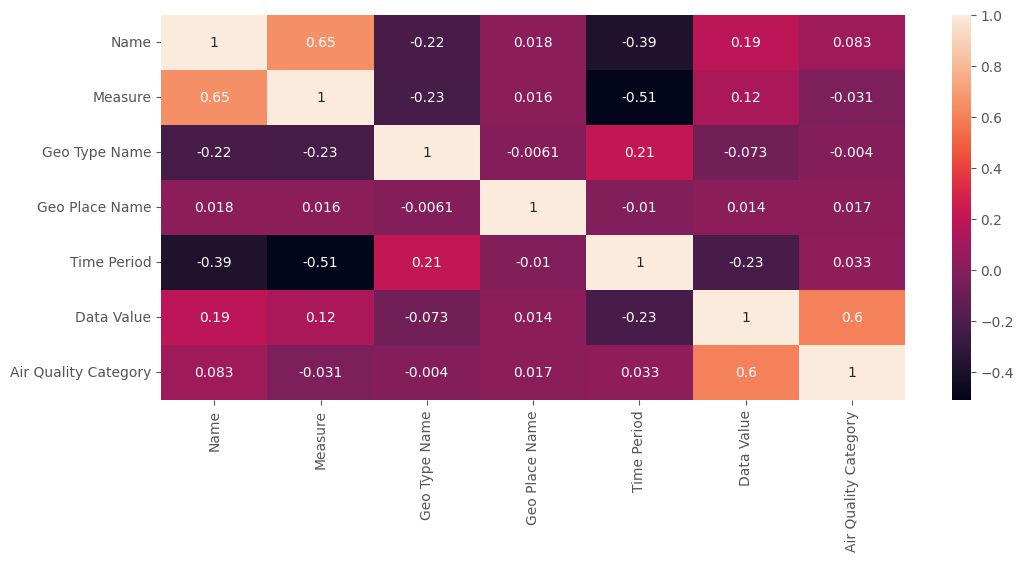

In [13]:
correlation = encoded_df.drop(["Unique ID", "Start_Date"], axis = 1).corr()
plt.figure(figsize = (12,5))
sns.heatmap(correlation, annot = True)

In [14]:
from sklearn.feature_selection import mutual_info_classif

import plotly.express as px

X, y = df.drop(["Unique ID", "Start_Date", "Air Quality Category"], axis = 1), df["Air Quality Category"]

mutual_info = mutual_info_classif(X, y)

mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})

mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

fig = px.bar(mutual_info_df, x='Mutual Information', y='Feature', orientation='h', title='Mutual Information of Features with Air Quality Category')
fig.show(renderer = "iframe")

Accuracy score for class 0: 0.9047513321492007
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1453
           1       0.85      0.91      0.88      1755
           2       0.91      0.83      0.87      1296

    accuracy                           0.90      4504
   macro avg       0.91      0.90      0.91      4504
weighted avg       0.91      0.90      0.90      4504

--------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score for class 0: 0.9047513321492007
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1453
           1       0.85      0.92      0.88      1755
           2       0.93      0.82      0.87      1296

    accuracy                           0.90      4504
   macro avg       0.91      0.90      0.91      4504
weighted avg       0.91      0.90      0.90      4504

---

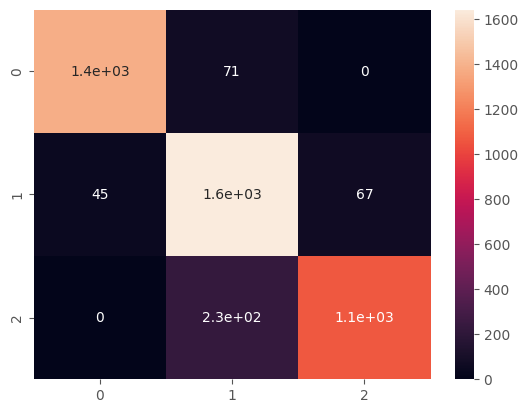

GaussianNB()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


def predict(model):
    best_score = 0
    """Predicts the isActivated with the model"""
    X, y = df.drop(["Unique ID", "Start_Date", "Air Quality Category", "Geo Type Name", "Geo Place Name"], axis = 1), df["Air Quality Category"]

    skf = StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.25)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_score:
            best_score = accuracy
            best_model = model

        print(f"Accuracy score for class 0: {accuracy}")
        print(classification_report(y_test, y_pred))
        print("--------------" * 10)

    print(f"Best model: {best_model}")
    print(f"Best score: {best_score}")
    sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot = True)
    plt.show()
    
    return best_model

predict(GaussianNB())

Accuracy score for class 0: 0.997113676731794
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1453
           1       1.00      0.99      1.00      1755
           2       0.99      1.00      1.00      1296

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504

--------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score for class 0: 0.9933392539964476
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1453
           1       1.00      0.98      0.99      1755
           2       0.99      1.00      0.99      1296

    accuracy                           0.99      4504
   macro avg       0.99      0.99      0.99      4504
weighted avg       0.99      0.99      0.99      4504

----

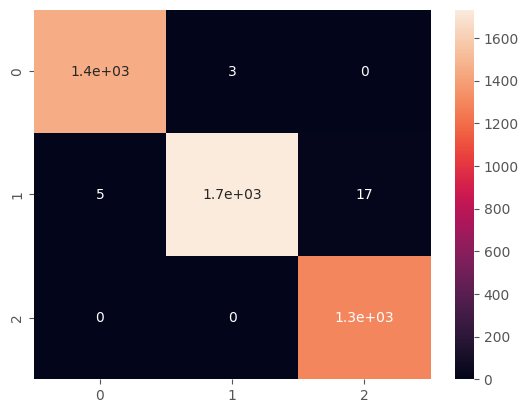

SVC()

In [16]:
predict(SVC())